## Classification (Iris dataset)


---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* Chulalongkorn Business School, Thailand
---


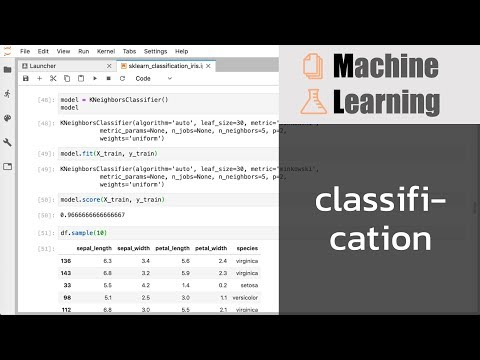

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("n2b_0GTN91Q", width=720, height=405)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# %config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format='svg'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")


pandas  version = 1.3.4
numpy   version = 1.22.4
seaborn version = 0.11.2


In [4]:
pd.Timestamp.now()


Timestamp('2022-09-27 13:06:51.022342')

In [5]:
df = pd.read_csv("https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv")
df.sample(10)


,sepal_length,sepal_width,petal_length,petal_width,species
136,6.3,3.4,5.6,2.4,virginica
76,6.8,2.8,4.8,1.4,versicolor
41,4.5,2.3,1.3,0.3,setosa
114,5.8,2.8,5.1,2.4,virginica
68,6.2,2.2,4.5,1.5,versicolor
82,5.8,2.7,3.9,1.2,versicolor
132,6.4,2.8,5.6,2.2,virginica
121,5.6,2.8,4.9,2.0,virginica
87,6.3,2.3,4.4,1.3,versicolor
17,5.1,3.5,1.4,0.3,setosa


In [6]:
df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
df.groupby("species").mean()



,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [8]:
df.species.value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

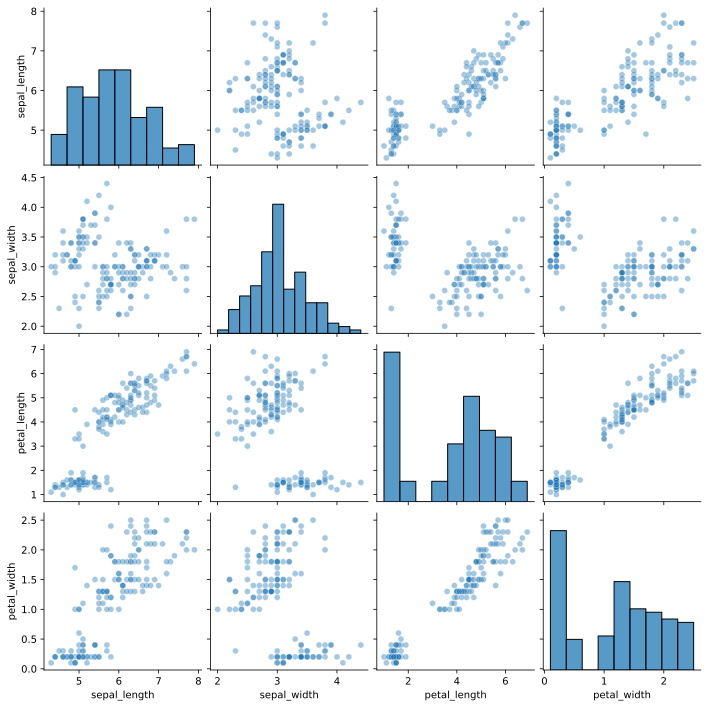

In [10]:
sns.pairplot(
    df,
    vars=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    #              hue='species',
    #              markers=['o', 'D', '+'],
    plot_kws={"alpha": 0.4},
)



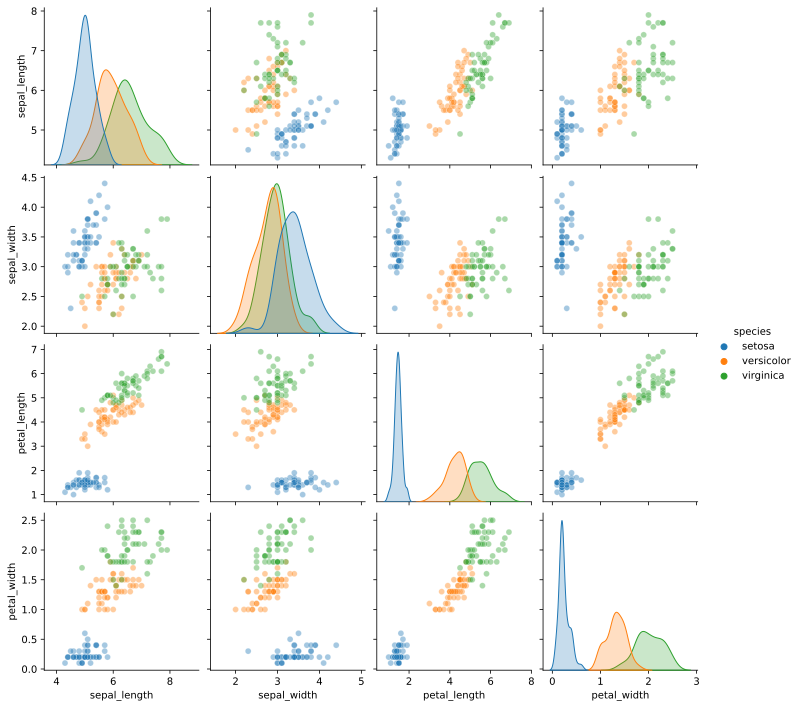

In [11]:
sns.pairplot(
    df,
    vars=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    hue="species",
    # markers=["o", "D", "+"],
    plot_kws={"alpha": 0.4},
)



In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Scikit-learn: KNeighborsClassifier


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [14]:
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
# use all data for training
# X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# y_train = df.species
# y_train = df.species_code

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    df[["sepal_length", "sepal_width", "petal_length", "petal_width"]],
    df.species,
    test_size=test_size,
    random_state=7,
)



In [16]:
X_train.head()


,sepal_length,sepal_width,petal_length,petal_width
126,6.2,2.8,4.8,1.8
79,5.7,2.6,3.5,1.0
22,4.6,3.6,1.0,0.2
139,6.9,3.1,5.4,2.1
74,6.4,2.9,4.3,1.3


In [17]:
y_train.head()


126     virginica
79     versicolor
22         setosa
139     virginica
74     versicolor
Name: species, dtype: object

In [18]:
X_test.head()


,sepal_length,sepal_width,petal_length,petal_width
149,5.9,3.0,5.1,1.8
84,5.4,3.0,4.5,1.5
40,5.0,3.5,1.3,0.3
66,5.6,3.0,4.5,1.5
106,4.9,2.5,4.5,1.7


In [19]:
y_test.head()


149     virginica
84     versicolor
40         setosa
66     versicolor
106     virginica
Name: species, dtype: object

In [20]:
model = KNeighborsClassifier(n_neighbors=5)
model


KNeighborsClassifier()

In [21]:
model.fit(X_train, y_train)


KNeighborsClassifier()

In [22]:
model.score(X_train, y_train)


0.9833333333333333

In [23]:
model.score(X_test, y_test)


0.9

In [24]:
df.sample(10)


,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
54,6.5,2.8,4.6,1.5,versicolor
67,5.8,2.7,4.1,1.0,versicolor
134,6.1,2.6,5.6,1.4,virginica
11,4.8,3.4,1.6,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
51,6.4,3.2,4.5,1.5,versicolor
117,7.7,3.8,6.7,2.2,virginica
10,5.4,3.7,1.5,0.2,setosa
137,6.4,3.1,5.5,1.8,virginica


In [25]:
df.sample(5)


,sepal_length,sepal_width,petal_length,petal_width,species
38,4.4,3.0,1.3,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
132,6.4,2.8,5.6,2.2,virginica
82,5.8,2.7,3.9,1.2,versicolor
148,6.2,3.4,5.4,2.3,virginica


In [26]:
model.predict([[3, 4, 5, 6]])



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

In [27]:
model.predict([[3, 4, 5, 6], [3, 4, 5, 2], [5, 3.5, 1.5, 0.2]])



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['virginica', 'versicolor', 'setosa'], dtype=object)

In [28]:
df.groupby("species").mean()



,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [29]:
model.predict([[5, 3, 1.2, 0.3], [5, 3, 1.2, 2], [6.5, 3, 5, 2]])



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa', 'setosa', 'virginica'], dtype=object)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


-   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
-   https://en.wikipedia.org/wiki/Confusion_matrix


In [31]:
X_test[:5]


,sepal_length,sepal_width,petal_length,petal_width
149,5.9,3.0,5.1,1.8
84,5.4,3.0,4.5,1.5
40,5.0,3.5,1.3,0.3
66,5.6,3.0,4.5,1.5
106,4.9,2.5,4.5,1.7


In [32]:
y_test[:5]


149     virginica
84     versicolor
40         setosa
66     versicolor
106     virginica
Name: species, dtype: object

In [33]:
predicted = model.predict(X_test)
predicted


array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [34]:
dx = pd.DataFrame({"y_true": y_test, "y_pred": predicted})
# dx
dx[dx.y_true != dx.y_pred]


,y_true,y_pred
106,virginica,versicolor
77,versicolor,virginica
119,virginica,versicolor


In [35]:
cm = confusion_matrix(y_test, predicted)
cm


array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  2,  9]], dtype=int64)

In [36]:
labels = df.species.unique()
labels


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [37]:
dcm = pd.DataFrame(cm, index=labels, columns=labels)
dcm


,setosa,versicolor,virginica
setosa,7,0,0
versicolor,0,11,1
virginica,0,2,9


In [38]:
def grandtotal(df):
    """
    add grand total to sklearn confusion matrix dataframe
    """
    index_labels = df.index.tolist()
    df = df.append(df.sum(axis=0), ignore_index=True)
    df.index = index_labels + ["total"]
    df["total"] = df.sum(axis=1)
    return df


In [39]:
grandtotal(dcm)


,setosa,versicolor,virginica,total
setosa,7,0,0,7
versicolor,0,11,1,12
virginica,0,2,9,11
total,7,13,10,30


In [40]:
accuracy_score(y_test, predicted)


0.9

In [41]:
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



## Logistic Regression


In [42]:
model_b = LogisticRegression(solver="liblinear")
model_b


LogisticRegression(solver='liblinear')

In [43]:
model_b.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [44]:
model_b.score(X_train, y_train)


0.975

In [45]:
model_b.score(X_test, y_test)


0.8

In [46]:
predicted_b = model_b.predict(X_test)
predicted_b


array(['virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [47]:
print(confusion_matrix(y_test, predicted_b))


[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]


In [48]:
print(accuracy_score(y_test, predicted_b))


0.8


In [49]:
print(classification_report(y_test, predicted_b))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.88      0.58      0.70        12
   virginica       0.67      0.91      0.77        11

    accuracy                           0.80        30
   macro avg       0.85      0.83      0.82        30
weighted avg       0.83      0.80      0.80        30

